In [83]:
%matplotlib inline

from pathlib import Path

from zipfile import ZipFile
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
import nltk
from nltk import word_tokenize          
from nltk.stem.snowball import EnglishStemmer 
import matplotlib.pylab as plt
from dmba import printTermDocumentMatrix, classificationSummary, liftChart

nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\judyj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
import warnings
warnings.filterwarnings(action='ignore')

## 20.1 

#### 통계 교과에서 온라인 학습포럼에 올라온 포스트의 다음과 같은 텍스트 버전에 대해서 질문에 답하시오.

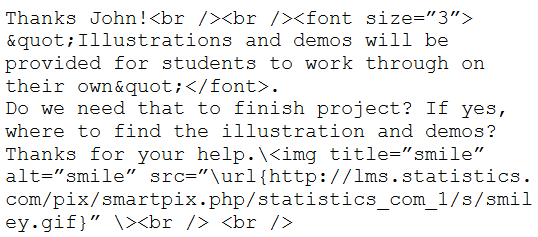

In [16]:
Image('D:\화면 캡처 2022-03-04 102629.png')

#### a. 이 글에서 10개의 비단어 토큰을 규정하시오.

https://www.sketchengine.eu/my_keywords/non-word/

In [ ]:
'Thanks John!<br /><br /><font size=”3”>
     &quot;Illustrations and demos will be
     provided for students to work through on
     their own&quot;</font>.
     Do we need that to finish project? If yes,
     where to find the illustration and demos?
     Thanks for your help.\<img title=”smile”
     alt=”smile” src=”\url{http://lms.statistics.
     com/pix/smartpix.php/statistics_com_1/s/smil
     ey.gif}” \><br /> <br />'

In [ ]:
<br /> 
<font size=”3”>
&quot; 
</font>
"3"  
"smile"  
\url
<img title="smile", alt="smile",src="\url(http://lms.statistics.com/pix/smartpix.php/statistics_com_1/s/smiley.gif)">

#### b. 이 글이 분류되어야 할 문서가 되지만 분류작업의 비즈니스 목표에 확신이 없다고 가정하자. 당신의 판단으로 그 목표를 알 필요 없이 상당히 안전하게 삭제될 수 있는 재료(적어도 20%의 용어들)를 규정하시오.

and  
will  
be  
for  
to  
through  
on  
do  
that  
if  
yes  
your  

#### c. 분류작업이 이 포스트를 강사가 주목해야 할지, 또는 조교가 보는 것으로 충분할지를 예측하는 것이라고 가정하자. 그 작업을 위해서 가장 도움이 될 수 있다고 생각하는 20%의 용어를 규정하시오.

demos  
provided  
where  
finish   
project   
help

#### d. 의미를 추출하는 접근방식과 반대로 단순히 단어 주머니 접근방식을 사용한다는 시각의 가장 큰 문제는 이 글의 어떤 측면인가?

html 문법에 따라서 작성된 문서인데 순서, 문법, 신택스 상관 없이 단어들의 집합으로 취급되는 문제가 있음. 

## 20.2

#### 이 문제에서는 이 장의 예제에서 설명했던 데이터와 시나리오를 사용할 것인데, 문서들을 자동차 관련된 것인지 전자제품 관련된 것인지 분류하는 모델을 구축하는 작업이다.

#### a. 이 zip 파일을 로드하고 레이블 벡터를 생성하시오.

In [101]:
# Step 1: import and label records
corpus = []
label = []
with ZipFile('D:/숙탯 2기/dmba-datasets/AutoAndElectronics.zip') as rawData:
    for info in rawData.infolist():
        if info.is_dir():     # is_dir() : 폴더 존재 여부 확인
            continue
        label.append(1 if 'rec.autos' in info.filename else 0)
        corpus.append(rawData.read(info))

#### b. 이 장의 예제를 따라서 문서들을 전처리하시오. "스테밍" 단계를 수행하지 않으면 무엇이 달라질지 설명하시오.

1) stemming 단계 수행하지 않음

In [3]:
# Step 2: preprocessing (tokenization, and stopwords)

preprocessor = CountVectorizer(stop_words=ENGLISH_STOP_WORDS, encoding='latin1')
preprocessedText = preprocessor.fit_transform(corpus)

In [4]:
preprocessedText

<2000x29069 sparse matrix of type '<class 'numpy.int64'>'
	with 265852 stored elements in Compressed Sparse Row format>

2) stemming 단계 수행 - 이 상태로 진행

In [102]:
# Step 2: preprocessing (tokenization, stemming, and stopwords)
class LemmaTokenizer(object):
    def __init__(self):
        self.stemmer = EnglishStemmer()
        self.stopWords = set(ENGLISH_STOP_WORDS)
    def __call__(self, doc):
        return [self.stemmer.stem(t) for t in word_tokenize(doc) 
                if t.isalpha() and t not in self.stopWords]

preprocessor = CountVectorizer(tokenizer=LemmaTokenizer(), encoding='latin1')
preprocessedText = preprocessor.fit_transform(corpus)

In [5]:
preprocessedText

<2000x13515 sparse matrix of type '<class 'numpy.int64'>'
	with 159753 stored elements in Compressed Sparse Row format>

stemming 단계를 수행하지 않을 경우 stemming 단계를 수행할 때보다 용어의 수가 늘어난다.

#### c. lsa를 사용하여 10개의 개념을 생성하시오. 이 개념행렬이 TF-IDF 행렬에 비해서 무엇이 다른지 설명하시오.

1) 개념행렬

In [103]:
tfidfTransformer = TfidfTransformer()
tfidf = tfidfTransformer.fit_transform(preprocessedText)

svd = TruncatedSVD(10)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

lsa_tfidf = lsa.fit_transform(tfidf)

In [104]:
printTermDocumentMatrix(preprocessor, lsa_tfidf)

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

In [105]:
from scipy import sparse

svd = TruncatedSVD(10)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

lsa_tfidf = lsa.fit_transform(tfidf)

sA = sparse.csr_matrix(lsa_tfidf)
printTermDocumentMatrix(preprocessor, sA)

ValueError: Shape of passed values is (10, 2000), indices imply (13515, 2000)

cf) TF-IDF 행렬

In [52]:
tfidfTransformer = TfidfTransformer()
tfidf = tfidfTransformer.fit_transform(preprocessedText)
printTermDocumentMatrix(preprocessor, tfidf)

          S1   S2   S3   S4   S5   S6   S7   S8   S9  S10  ...  S1991  S1992  \
aa       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
aaa      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
aaaaa    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
aaahh    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
aaltern  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
zurich   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
zwar     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
zx       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
zyxel    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
þ        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   

         S1993  S1994  S1995  S1996  S1

개념행렬이 TF-IDF 행렬보다 더 작은 행렬일 것이므로 예측모델에서 효율적으로 분석할 수 있음.

#### d. 이 행렬을 사용하여 문서들을 자동차나 전자제품으로 분류하는 (이 장의 설명에서 사용한 모델과 다른) 예측모델을 적합하시오. 그 성능을 이 장의 설명에서 사용한 모델과 비교하시오.    (* 로지스틱 회귀: Accuracy 0.9587)

대표적인 분류 알고리즘  
https://iphoong.tistory.com/6

#### 1) 나이브 베이즈

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
lsa_tfidf = scaler.fit_transform(lsa_tfidf)

# split dataset into 60% training and 40% test set
Xtrain, Xtest, ytrain, ytest = train_test_split(lsa_tfidf, label, test_size=0.4, random_state=42)

# run naive Bayes
from sklearn.naive_bayes import MultinomialNB

doc_nb = MultinomialNB(alpha=0.01)
doc_nb.fit(Xtrain, ytrain)

# print confusion matrix and accuracy
classificationSummary(ytest, doc_nb.predict(Xtest))

Confusion Matrix (Accuracy 0.9575)

       Prediction
Actual   0   1
     0 386  11
     1  23 380


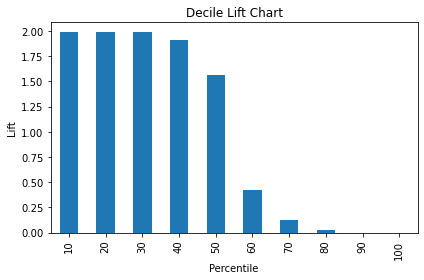

In [22]:
df = pd.DataFrame(data={'prob': [p[1] for p in doc_nb.predict_proba(Xtest)], 'actual': ytest})
df = df.sort_values(by=['prob'], ascending=False).reset_index(drop=True)

ax = liftChart(df.actual, labelBars=False)

plt.tight_layout()
plt.show()

#### 2) KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': [(1), (2), (3), (4), (5)], 
    'p' : [(1), (2)]
}
gridSearch = GridSearchCV(KNeighborsClassifier(), 
                          param_grid, cv=5, n_jobs=-1, return_train_score=True)
gridSearch.fit(Xtrain, ytrain)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

Initial score:  0.9566666666666667
Initial parameters:  {'n_neighbors': 5, 'p': 2}


In [49]:
knn = KNeighborsClassifier(n_neighbors=5, p=2).fit(Xtrain, ytrain)
classificationSummary(ytest, knn.predict(Xtest))

Confusion Matrix (Accuracy 0.9500)

       Prediction
Actual   0   1
     0 386  11
     1  29 374


In [54]:
knn = KNeighborsClassifier(n_neighbors=5, p=1).fit(Xtrain, ytrain)
classificationSummary(ytest, knn.predict(Xtest))

Confusion Matrix (Accuracy 0.9537)

       Prediction
Actual   0   1
     0 385  12
     1  25 378


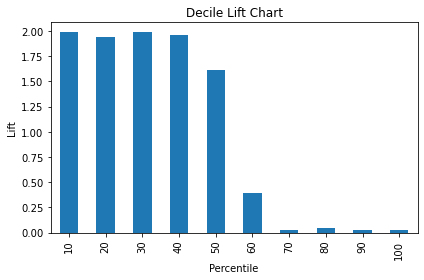

In [55]:
df = pd.DataFrame(data={'prob': [p[1] for p in knn.predict_proba(Xtest)], 'actual': ytest})
df = df.sort_values(by=['prob'], ascending=False).reset_index(drop=True)

ax = liftChart(df.actual, labelBars=False)

plt.tight_layout()
plt.show()

#### 3) 분류나무

In [57]:
from sklearn.tree import DecisionTreeClassifier
from dmba import plotDecisionTree

param_grid = {
    'max_depth': list(range(2, 16)), 
    'min_samples_split': list(range(10, 22)), 
    'min_impurity_decrease': [0.0009, 0.001, 0.0011], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(Xtrain, ytrain)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)

Improved score:  0.9516666666666668
Improved parameters:  {'max_depth': 4, 'min_impurity_decrease': 0.0009, 'min_samples_split': 19}


In [60]:
bestClassTree = gridSearch.best_estimator_
bestClassTree.fit(Xtrain, ytrain)

classificationSummary(ytest, bestClassTree.predict(Xtest))

Confusion Matrix (Accuracy 0.9463)

       Prediction
Actual   0   1
     0 383  14
     1  29 374


In [71]:
classTree = DecisionTreeClassifier(random_state=0, max_depth=1)    #max_depth=5부터는 정확도 감소함
classTree.fit(Xtrain, ytrain)

classificationSummary(ytest, classTree.predict(Xtest))

Confusion Matrix (Accuracy 0.9550)

       Prediction
Actual   0   1
     0 388   9
     1  27 376


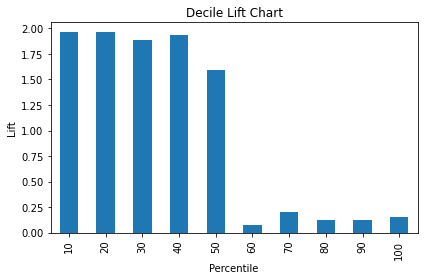

In [27]:
df = pd.DataFrame(data={'prob': [p[1] for p in classTree.predict_proba(Xtest)], 'actual': ytest})
df = df.sort_values(by=['prob'], ascending=False).reset_index(drop=True)

ax = liftChart(df.actual, labelBars=False)

plt.tight_layout()
plt.show()

#### 4) 랜덤포레스트 분류기

In [20]:
# split dataset into 60% training and 40% test set
Xtrain, Xtest, ytrain, ytest = train_test_split(lsa_tfidf, label, test_size=0.4, random_state=42)

# run randomforest model on training
from sklearn.ensemble import RandomForestClassifier

rfmodel = RandomForestClassifier()
rfmodel.fit(Xtrain, ytrain)

# print confusion matrix and accuracy
classificationSummary(ytest, rfmodel.predict(Xtest))

Confusion Matrix (Accuracy 0.9587)

       Prediction
Actual   0   1
     0 386  11
     1  22 381


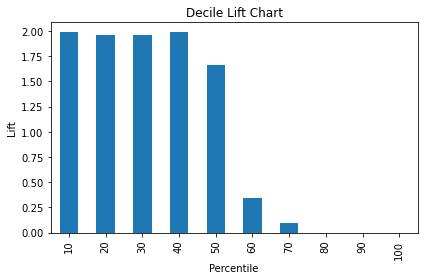

In [22]:
df = pd.DataFrame(data={'prob': [p[1] for p in rfmodel.predict_proba(Xtest)], 'actual': ytest})
df = df.sort_values(by=['prob'], ascending=False).reset_index(drop=True)

ax = liftChart(df.actual, labelBars=False)

plt.tight_layout()
plt.show()

#### 5) 신경망

In [35]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(1), (2), (3), (4), (5)], 
}
gridSearch = GridSearchCV(MLPClassifier(activation='logistic', solver='lbfgs', random_state=1), 
                          param_grid, cv=5, n_jobs=-1, return_train_score=True)
gridSearch.fit(Xtrain, ytrain)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

Initial score:  0.96
Initial parameters:  {'hidden_layer_sizes': 3}


In [84]:
clf = MLPClassifier(hidden_layer_sizes=(3), activation='logistic', solver='lbfgs', random_state=1)
clf.fit(Xtrain, ytrain)

# print confusion matrix and accuracy
classificationSummary(ytest, clf.predict(Xtest))

Confusion Matrix (Accuracy 0.9625)

       Prediction
Actual   0   1
     0 385  12
     1  18 385


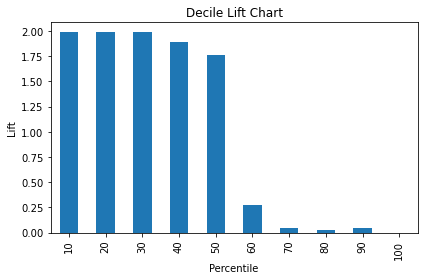

In [85]:
df = pd.DataFrame(data={'prob': [p[1] for p in clf.predict_proba(Xtest)], 'actual': ytest})
df = df.sort_values(by=['prob'], ascending=False).reset_index(drop=True)

ax = liftChart(df.actual, labelBars=False)

plt.tight_layout()
plt.show()

#### 6) SVM

In [81]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(Xtrain, ytrain)

# print confusion matrix and accuracy
classificationSummary(ytest, clf.predict(Xtest))

Confusion Matrix (Accuracy 0.9613)

       Prediction
Actual   0   1
     0 388   9
     1  22 381


In [88]:
clf = svm.SVC(kernel='poly')
clf.fit(Xtrain, ytrain)

# print confusion matrix and accuracy
classificationSummary(ytest, clf.predict(Xtest))

Confusion Matrix (Accuracy 0.9625)

       Prediction
Actual   0   1
     0 389   8
     1  22 381


In [82]:
clf = svm.SVC(kernel='rbf')
clf.fit(Xtrain, ytrain)

# print confusion matrix and accuracy
classificationSummary(ytest, clf.predict(Xtest))

Confusion Matrix (Accuracy 0.9600)

       Prediction
Actual   0   1
     0 390   7
     1  25 378


In [89]:
df = pd.DataFrame(data={'prob': [p[1] for p in clf.predict_proba(Xtest)], 'actual': ytest})
df = df.sort_values(by=['prob'], ascending=False).reset_index(drop=True)

ax = liftChart(df.actual, labelBars=False)

plt.tight_layout()
plt.show()

AttributeError: predict_proba is not available when  probability=False

#### 결론) 신경망과 svm이 가장 분류성능이 좋다.

## 20.3

#### 어떤 농업공동체의 구미에 맞춰서 그 공동체가 요구하는 안내광고를 싣는 웹사이트의 사례를 가정하자.  사이트 운영자들은 사기, 스팸, 이 공동체에 관련이 없는 광고들 때문에 골치가 아프다. 그들은 각 행이 광고이고 각 광고는 -1(관련 없음)이나 1(관련 있음)로 레이블된 4143개의 광고들을 하나의 파일로 제공했다. 목적은 광고들을 자동으로 분류할 수 있는 예측 모델을 개발하고자 한다.

In [66]:
farmAds_df = pd.read_csv('D:/숙탯 2기/dmba-datasets/farm-ads.csv')
farmAds_df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11
0,0,1,ad-jerry,ad-bruckheimer,ad-chase,ad-premier,ad-sept,ad-th,ad-clip,ad-bruckheimer,ad-chase,page,found
1,1,-1,ad-symptom,ad-muscle,ad-weakness,ad-genetic,ad-disease,ad-symptom,ad-include,ad-search,ad-learn,page,found
2,2,1,ad-animal,ad-animal,ad-wild,ad-sa,ad-official,ad-tourism,ad-website,page,found,NaN,NaN
3,3,-1,ad-vaccination,ad-expert,ad-tip,ad-info,ad-article,ad-treatment,ad-option,ad-support,page,found,NaN
4,4,1,ad-vet,ad-online,ad-veterinarian,ad-online,ad-question,ad-answer,ad-asap,bad,request,NaN,NaN


In [69]:
farmAds_df.shape

(317, 13)

## 20.4

#### 이 문제에서는 이 장의 예제에서 설명한 데이터와 시나리오를 사용할 것이다. 과제는 자동차 포스트를 클러스터링하는 것이다.

#### a. 이 장의 예제를 따라서 문서들을 전처리하되, 레이블 벡터는 생성하지 마시오.

In [106]:
# Step 1: import
corpus = []
with ZipFile('D:/숙탯 2기/dmba-datasets/AutoAndElectronics.zip') as rawData:
    for info in rawData.infolist():
        if info.is_dir():
            continue
        if 'rec.autos' in info.filename:
            corpus.append(rawData.read(info))

In [107]:
len(corpus)

1000

In [108]:
# Step 2: preprocessing (tokenization, stemming, and stopwords)
class LemmaTokenizer(object):
    def __init__(self):
        self.stemmer = EnglishStemmer()
        self.stopWords = set(ENGLISH_STOP_WORDS)
    def __call__(self, doc):
        return [self.stemmer.stem(t) for t in word_tokenize(doc) 
                if t.isalpha() and t not in self.stopWords]

preprocessor = CountVectorizer(tokenizer=LemmaTokenizer(), encoding='latin1')
preprocessedText = preprocessor.fit_transform(corpus)

#### b. lsa를 사용하여 10개의 개념을 생성하시오.

In [109]:
# Step 3: TF-IDF and latent semantic analysis 
tfidfTransformer = TfidfTransformer()

svd = TruncatedSVD(10)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

lsa_tfidf = lsa.fit_transform(tfidf)

#### c. 클러스터링을 하기 전에 몇 개의 클러스터를 찾기 기대하는지 명시하시오.

#### d. 계층적 클러스터링을 수행하고 덴드로그램을 검토하시오.

In [110]:
%matplotlib inline

from pathlib import Path

import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates


In [115]:
lsa_tfidf.dtype

dtype('float64')

In [116]:
lsa_tfidf_norm = preprocessing.scale(lsa_tfidf)

In [120]:
lsa_tfidf_norm

array([[-1.32275746,  1.84999175, -0.18023642, ..., -0.81164788,
        -0.94176782, -0.80333106],
       [ 1.13184256,  1.18573107, -0.40222869, ..., -0.26435357,
        -0.61783639,  0.53013846],
       [ 0.04076559, -0.6460118 , -0.04999326, ...,  0.67070119,
        -2.13938899,  0.23880274],
       ...,
       [-2.02155312, -0.73847971, -2.55759367, ...,  0.68037224,
        -0.0990263 , -0.42585057],
       [ 0.19220895, -0.95247489, -0.19581165, ...,  0.1506198 ,
        -0.30064013,  0.92503189],
       [-2.90059984, -0.51517912, -0.19398643, ...,  0.92133984,
        -0.11077582, -0.65386385]])

In [ ]:
Z = linkage(lsa_tfidf_norm, method='single')

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.23)
# plt.title('Hierarchical Clustering Dendrogram (Single linkage)')
# plt.xlabel('Company')
dendrogram(Z, labels= ?? , color_threshold=2.75)
plt.axhline(y=2.75, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

#### e. 두 개의 클러스터를 찾기 위해 k-means 클러스터링을 수행하고, (클러스터 간 거리와 클러스터 내 분산을 사용하여) 그 둘이 얼마나 멀리 분리되어 있는지 보고하시오.

In [ ]:
from sklearn.cluster import KMeans